# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [1]:
import numpy as np
from datascience import *

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Hypothesis Test Simulation: Does your phone affect Uber/Lyft prices?

In [3]:
link_for_a_b_testing_results = 'https://docs.google.com/spreadsheets/d/1RcUJXrlxHoJShR00Ra9TbKg3FY-LQ4AVr9JRYCJzrQA/export?format=csv'

ride_share_table = Table().read_table(link_for_a_b_testing_results).drop('Timestamp')
ride_share_table

phone_type,app_name,price


### "Define my test statistic" based upon my Hypothesis

In [3]:
grouped_by_phone = ride_share_table.group('phone_type',np.average)
grouped_by_phone

phone_type,app_name average,price average
Apple,,28.9311
not Apple,,27.596


In [4]:
average_by_phone_type_array = grouped_by_phone.column('price average')
average_by_phone_type_array

array([ 28.93107143,  27.596     ])

In [6]:
test_statistic = average_by_phone_type_array.item(0)-average_by_phone_type_array.item(1)
test_statistic

1.3350714285714282

### Shuffle the labels of the original sample

In [24]:
# Run this cell a few times to observe that the order of the rows keep changing each time we run it
ride_share_table.sample(ride_share_table.num_rows,with_replacement=False)

phone_type,app_name,price
Apple,Lyft,28.68
Apple,Uber,27.95
not Apple,Uber,27.98
Apple,Lyft,29.84
not Apple,Lyft,24.73
Apple,Uber,26.94
Apple,Uber,28.92
Apple,Lyft,28.99
not Apple,Lyft,27.83
not Apple,Uber,27.95


In [25]:
shuffled_labels = ride_share_table.sample(ride_share_table.num_rows,with_replacement=False).column('phone_type')
shuffled_labels

array(['Apple', 'Apple', 'Apple', 'not Apple', 'Apple', 'Apple',
       'not Apple', 'Apple', 'Apple', 'Apple', 'not Apple', 'Apple',
       'not Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple',
       'not Apple', 'not Apple', 'not Apple', 'Apple', 'Apple',
       'not Apple', 'Apple', 'not Apple', 'not Apple', 'Apple', 'Apple',
       'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple',
       'Apple', 'Apple'],
      dtype='<U9')

In [26]:
simulated_shuffle = ride_share_table.with_column('shuffled_label',shuffled_labels)
simulated_shuffle

phone_type,app_name,price,shuffled_label
Apple,Uber,28.99,Apple
Apple,Uber,28.95,Apple
Apple,Lyft,31.69,Apple
Apple,Uber,27.98,not Apple
not Apple,Uber,27.99,Apple
Apple,Lyft,28.68,Apple
not Apple,Lyft,25.94,not Apple
Apple,Lyft,27.89,Apple
Apple,Lyft,28.99,Apple
Apple,Uber,27.9,Apple


### Find your simulated test statistic

In [27]:
simulated_shuffle.group('shuffled_label',np.average)

shuffled_label,phone_type average,app_name average,price average
Apple,,,28.5332
not Apple,,,28.71


### Repeat many times

In [28]:
num_simulations = 1000
simulated_statistics_ab = make_array()

for i in np.arange(num_simulations):
    shuffled_labels = ride_share_table.sample(ride_share_table.num_rows,with_replacement=False).column('phone_type')
    simulated_shuffle = ride_share_table.with_column('shuffled_label',shuffled_labels)
    shuffled_group = simulated_shuffle.group('shuffled_label',np.average)
    
    average_by_phone_type_array = shuffled_group.column('price average')
    test_statistic_ab = average_by_phone_type_array.item(0)-average_by_phone_type_array.item(1)
    simulated_statistics_ab = np.append(simulated_statistics_ab,test_statistic_ab)   
    
    
simulated_statistics_ab

array([  1.28621429e+00,   9.60500000e-01,  -2.14785714e-01,
        -4.31928571e-01,   9.40142857e-01,   7.02142857e-02,
         9.70000000e-01,  -3.01642857e-01,   4.43428571e-01,
        -2.77214286e-01,  -1.09557143e+00,   1.48300000e+00,
         2.68357143e-01,  -8.97428571e-01,   2.43928571e-01,
         3.07714286e-01,  -2.62285714e-01,  -4.42857143e-03,
        -1.44214286e-01,  -4.29214286e-01,   7.70500000e-01,
        -5.70357143e-01,   1.77428571e-01,   3.26714286e-01,
        -2.31071429e-01,  -1.74071429e-01,  -5.54071429e-01,
        -8.28214286e-01,   3.66071429e-01,  -3.16571429e-01,
        -1.12142857e-02,  -7.64428571e-01,   7.15714286e-02,
         3.57928571e-01,   9.87142857e-02,  -4.59071429e-01,
         2.75142857e-01,   2.84642857e-01,  -6.00714286e-02,
         2.77857143e-01,   2.23571429e-01,   4.76000000e-01,
         4.93642857e-01,  -6.08357143e-01,   4.65142857e-01,
        -7.16928571e-01,   2.67000000e-01,  -3.03000000e-01,
         6.91785714e-01,

### Calculate p-value

In [29]:
observed_diff_ab = test_statistic

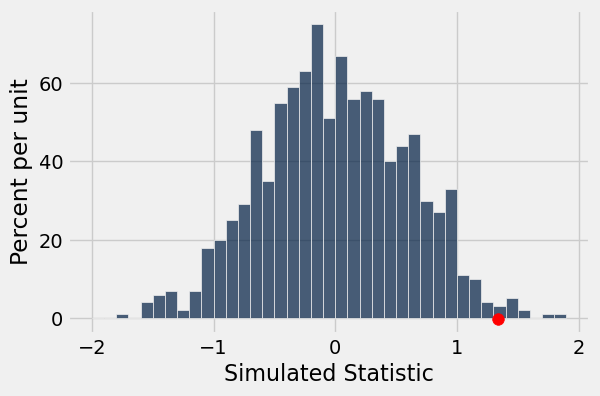

In [30]:
Table().with_columns('Simulated Statistic', simulated_statistics_ab).hist(bins = np.arange(-2,2,0.1))
plt.scatter(observed_diff_ab, -0.002, color='red', s=70);

In [31]:
observed_diff_ab

1.3350714285714282

In [32]:
p_value = np.count_nonzero(simulated_statistics_ab > observed_diff_ab)/num_simulations
p_value

0.011